In [1]:
# loading important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the dataset from the Excel file
import pandas as pd

trans=pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name='Transactions',skiprows=0,header=1)
newCustomer=pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name='NewCustomerList',skiprows=0,header=1)
customer=pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx",sheet_name= 'CustomerDemographic',skiprows=0,header=1)
address=pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name='CustomerAddress',skiprows=0,header=1)


In [3]:
#Viewing the top 5 records 
trans.head()

transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25           0.0   
1               2           3         3120       2017-05-21           1.0   
2               3          37          402       2017-10-16           0.0   
3               4          88         3135       2017-08-31           0.0   
4               5          78          787       2017-10-01           1.0   

  order_status           brand product_line product_class product_size  \
0     Approved           Solex     Standard        medium       medium   
1     Approved   Trek Bicycles     Standard        medium        large   
2     Approved      OHM Cycles     Standard           low       medium   
3     Approved  Norco Bicycles     Standard        medium       medium   
4     Approved  Giant Bicycles     Standard        medium        large   

   list_price  standard_cost  product_first_sold_date  
0       71.49          53.62                  41245.0  
1     2091.47         388.92                  41701.0  
2     1793.43         248.82                  36361.0  
3     1198.46         381.10                  36145.0  
4     1765.30         709.48                  42226.0

In [4]:
#Viewing the top 5 records 
customer.head()

customer_id      first_name  last_name  gender  \
0            1         Laraine  Medendorp       F   
1            2             Eli    Bockman    Male   
2            3           Arlin     Dearle    Male   
3            4          Talbot        NaN    Male   
4            5  Sheila-kathryn     Calton  Female   

   past_3_years_bike_related_purchases        DOB               job_title  \
0                                   93 1953-10-12     Executive Secretary   
1                                   81 1980-12-16  Administrative Officer   
2                                   61 1954-01-20      Recruiting Manager   
3                                   33 1961-10-03                     NaN   
4                                   56 1977-05-13           Senior Editor   

  job_industry_category     wealth_segment deceased_indicator  \
0                Health      Mass Customer                  N   
1    Financial Services      Mass Customer                  N   
2              Property      Mass Customer                  N   
3                    IT      Mass Customer                  N   
4                   NaN  Affluent Customer                  N   

                                             default owns_car  tenure  
0                                                 "'      Yes    11.0  
1                       <script>alert('hi')</script>      Yes    16.0  
2                                2018-02-01 00:00:00      Yes    15.0  
3  () { _; } >_[$($())] { touch /tmp/blns.shellsh...       No     7.0  
4                                                NIL      Yes     8.0

In [5]:
#Viewing the top 5 records 
address.head()

customer_id              address  postcode            state    country  \
0            1   060 Morning Avenue      2016  New South Wales  Australia   
1            2  6 Meadow Vale Court      2153  New South Wales  Australia   
2            4   0 Holy Cross Court      4211              QLD  Australia   
3            5  17979 Del Mar Point      2448  New South Wales  Australia   
4            6     9 Oakridge Court      3216              VIC  Australia   

   property_valuation  
0                  10  
1                  10  
2                   9  
3                   4  
4                   9

# Data Quality
* Validity
* Accuracy
* Completeness
* Consistency
* Uniformity

In [6]:
#Checking the DataTypes
trans.dtypes

transaction_id                      int64
product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                      float64
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date           float64
dtype: object

*Note:-As we obersred that the "product_first_sold_date " is uncleared the purpose of it, 
    as the name susggest its a date but the value it contains are in float.

In [7]:
#Checking the DataTypes
customer.dtypes

customer_id                                     int64
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
default                                        object
owns_car                                       object
tenure                                        float64
dtype: object

*Note:-The Columns "Default" has unknown values and not getting any informastion from it.

In [8]:
#Checking the DataTypes
address.dtypes

customer_id            int64
address               object
postcode               int64
state                 object
country               object
property_valuation     int64
dtype: object

In [9]:
#statistics of a numeric columns
trans.describe()

transaction_id   product_id   customer_id  online_order    list_price  \
count    20000.000000  20000.00000  20000.000000  19640.000000  20000.000000   
mean     10000.500000     45.36465   1738.246050      0.500458   1107.829449   
std       5773.647028     30.75359   1011.951046      0.500013    582.825242   
min          1.000000      0.00000      1.000000      0.000000     12.010000   
25%       5000.750000     18.00000    857.750000      0.000000    575.270000   
50%      10000.500000     44.00000   1736.000000      1.000000   1163.890000   
75%      15000.250000     72.00000   2613.000000      1.000000   1635.300000   
max      20000.000000    100.00000   5034.000000      1.000000   2091.470000   

       standard_cost  product_first_sold_date  
count   19803.000000             19803.000000  
mean      556.046951             38199.776549  
std       405.955660              2875.201110  
min         7.210000             33259.000000  
25%       215.140000             35667.000000  
50%       507.580000             38216.000000  
75%       795.100000             40672.000000  
max      1759.850000             42710.000000

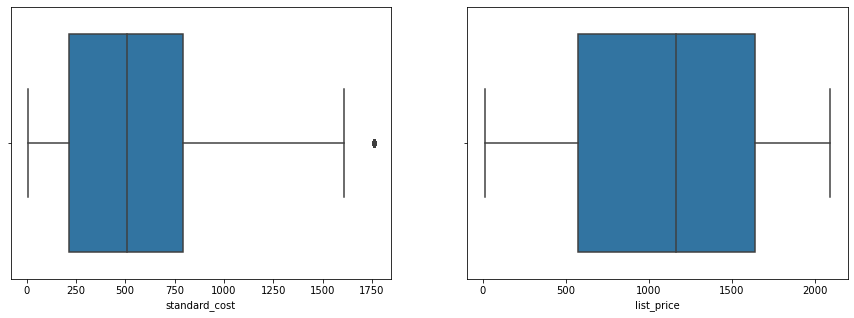

In [10]:
#checking Outliers 
plt.figure(figsize=(15,5))
plt.subplot(121);sns.boxplot(trans["standard_cost"])
plt.subplot(122);sns.boxplot(trans["list_price"])
plt.show()

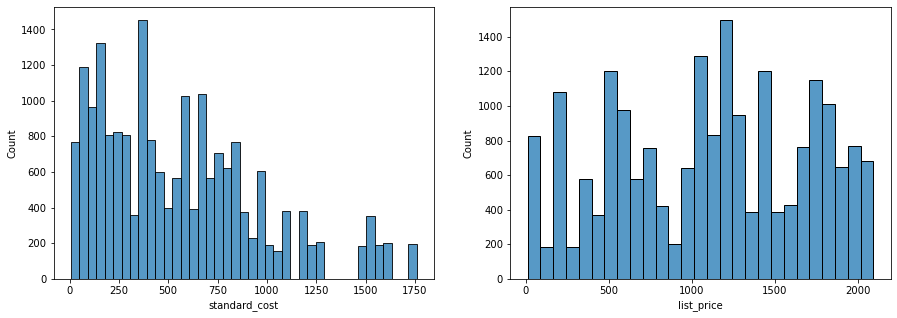

In [11]:
#checking the distribution 
plt.figure(figsize=(15,5))
plt.subplot(121);sns.histplot(trans["standard_cost"])
plt.subplot(122);sns.histplot(trans["list_price"])
plt.show()

*Note: "Standard_cost" have outliers and the data is right skewed.

In [12]:
#statistics of a numeric columns
customer.describe()

customer_id  past_3_years_bike_related_purchases       tenure
count  4000.000000                          4000.000000  3913.000000
mean   2000.500000                            48.890000    10.657041
std    1154.844867                            28.715005     5.660146
min       1.000000                             0.000000     1.000000
25%    1000.750000                            24.000000     6.000000
50%    2000.500000                            48.000000    11.000000
75%    3000.250000                            73.000000    15.000000
max    4000.000000                            99.000000    22.000000

In [13]:
#statistics of a numeric columns
address.describe()

customer_id     postcode  property_valuation
count  3999.000000  3999.000000         3999.000000
mean   2003.987997  2985.755939            7.514379
std    1154.576912   844.878364            2.824663
min       1.000000  2000.000000            1.000000
25%    1004.500000  2200.000000            6.000000
50%    2004.000000  2768.000000            8.000000
75%    3003.500000  3750.000000           10.000000
max    4003.000000  4883.000000           12.000000

In [14]:
#vewing the columns
trans.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [15]:
#Checking the null or NA values
trans.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

*Note:- Transaction table consist of missing values in some columns. 

In [16]:
#Overview of the data
from pandas_profiling import ProfileReport
profile = ProfileReport(trans, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
profile1 = ProfileReport(customer, title="Pandas Profiling Report1")
profile1

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
profile2 = ProfileReport(address, title="Pandas Profiling Report2")
profile2

Summarize dataset:   0%|          | 0/19 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

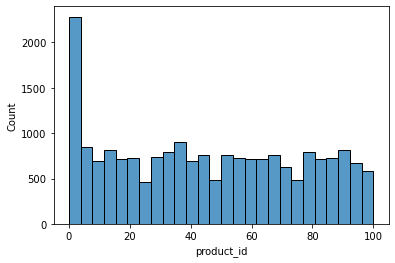

In [19]:
sns.histplot(trans["product_id"])
plt.show()

*Note:- As we can see from above graph that there are more than 2000 "product_id" as "0" but in reality it shouldn't be!

*Note:-we are unsure about the values used in "Product_id" as "0".

In [20]:
#checking the Null or NA values
customer.isnull().sum().sort_values(ascending=False)

job_industry_category                  656
job_title                              506
default                                302
last_name                              125
DOB                                     87
tenure                                  87
customer_id                              0
first_name                               0
gender                                   0
past_3_years_bike_related_purchases      0
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
dtype: int64

*Note:- Customer table consist of missing values in some columns. 

In [21]:
#statistics of a numeric columns
customer.describe()

customer_id  past_3_years_bike_related_purchases       tenure
count  4000.000000                          4000.000000  3913.000000
mean   2000.500000                            48.890000    10.657041
std    1154.844867                            28.715005     5.660146
min       1.000000                             0.000000     1.000000
25%    1000.750000                            24.000000     6.000000
50%    2000.500000                            48.000000    11.000000
75%    3000.250000                            73.000000    15.000000
max    4000.000000                            99.000000    22.000000

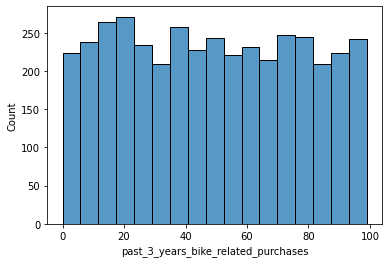

In [22]:
sns.histplot(customer['past_3_years_bike_related_purchases'])
plt.show()

In [23]:
#checking the Null or NA values
address.isnull().sum().sort_values(ascending=False)

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [24]:
#statistics of a numeric columns
address.describe()

customer_id     postcode  property_valuation
count  3999.000000  3999.000000         3999.000000
mean   2003.987997  2985.755939            7.514379
std    1154.576912   844.878364            2.824663
min       1.000000  2000.000000            1.000000
25%    1004.500000  2200.000000            6.000000
50%    2004.000000  2768.000000            8.000000
75%    3003.500000  3750.000000           10.000000
max    4003.000000  4883.000000           12.000000

In [25]:
#checking the Unique Values
trans.customer_id.nunique()

3494

In [26]:
#checking the Unique Values
customer.customer_id.nunique()

4000

In [27]:
#checking the Unique Values
address.customer_id.nunique()

3999